In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Create an engine for the sqlite database
engine = create_engine("sqlite:///db.sqlite", echo=False)

# Connect with database
connection = engine.connect()

# create dataframe from sql database
house_prices_df = pd.read_sql("select * from house_prices", con=connection)
house_prices_df.head()

index  id   price        date          address      suburb  bedrooms  \
0      0   1  565000  1535760000    1 Acorn Place  South Lake         4   
1      1   2  365000  1548979200      1 Addis Way       Wandi         3   
2      2   3  287000  1433116800  1 Ainsley Court     Camillo         3   
3      3   4  255000  1530403200  1 Albert Street    Bellevue         2   
4      4   5  325000  1477958400     1 Aman Place   Lockridge         4   

   bathrooms  land_area   latitude   longitude  
0          2        600 -32.115900  115.842450  
1          2        351 -32.193470  115.859553  
2          1        719 -32.120578  115.993579  
3          1        651 -31.900547  116.038009  
4          1        466 -31.885790  115.947780

In [3]:
X = house_prices_df[["price"]]
y = house_prices_df["date"].values.reshape(-1, 1)
print(X.shape, y.shape)

(33656, 1) (33656, 1)


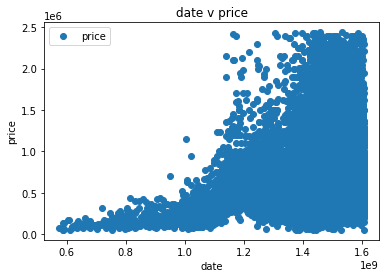

In [4]:
house_prices_df.plot(x='date', y='price', style='o')
plt.title('date v price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [18]:
# Split training data into features (x_train) and labels (Y_train)
# x_train = house_prices_df.drop(columns=["index","id","address","suburb","latitude","longitude","date"])
# Y_train = house_prices_df["date"]
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(house_prices_df, )



ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:

x_train = house_prices_df[["price"]]
Y_train = house_prices_df["date"]

In [6]:
def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model


In [7]:
def plot_mean_scores(Tuned_Model, col, x, y, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
2.640625 Seconds
finished running model


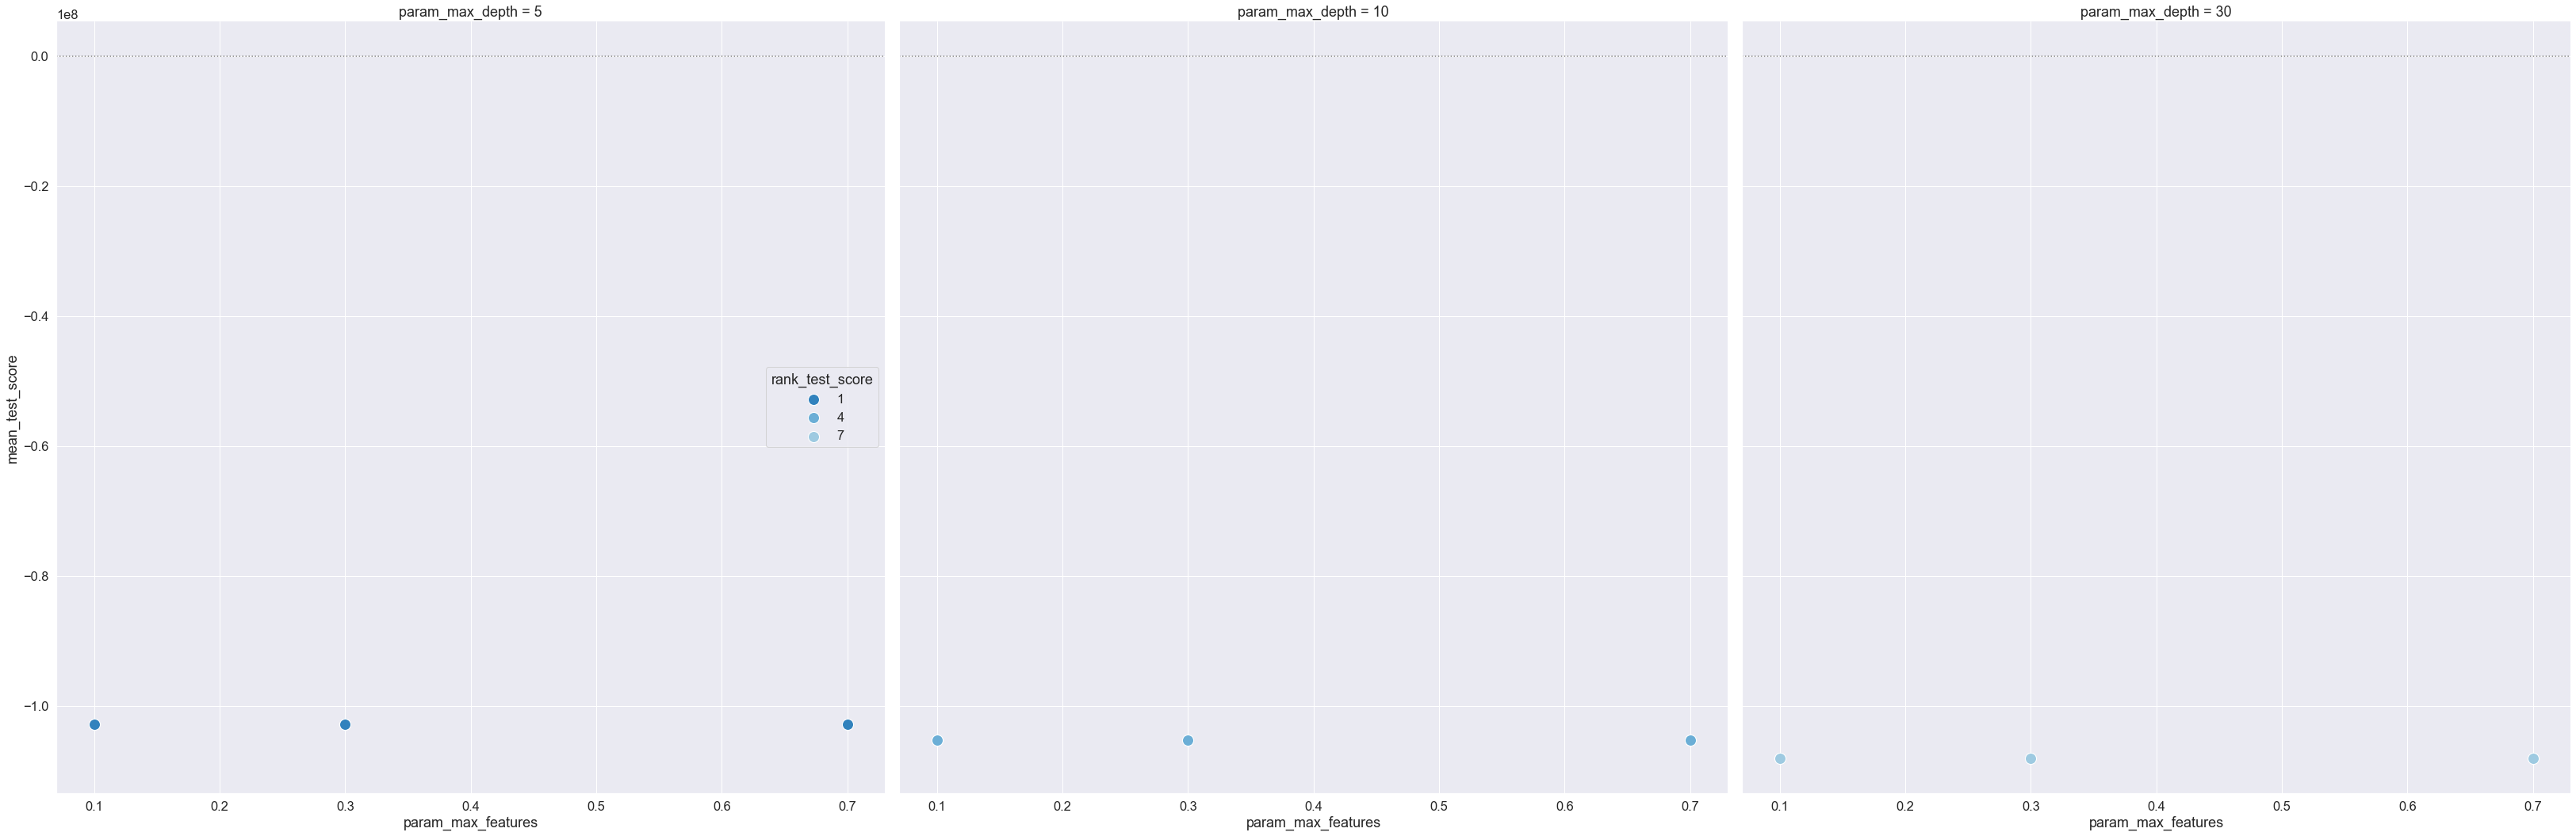

In [8]:
# Build a decision tree
# Set paramters for Grid Search CV
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
}
model = DecisionTreeRegressor(criterion="mse", random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model,
    ["param_max_depth"],
    "param_max_features",
    "mean_test_score",
    "DecisionTree",
)

running model
219.8125 Seconds
finished running model


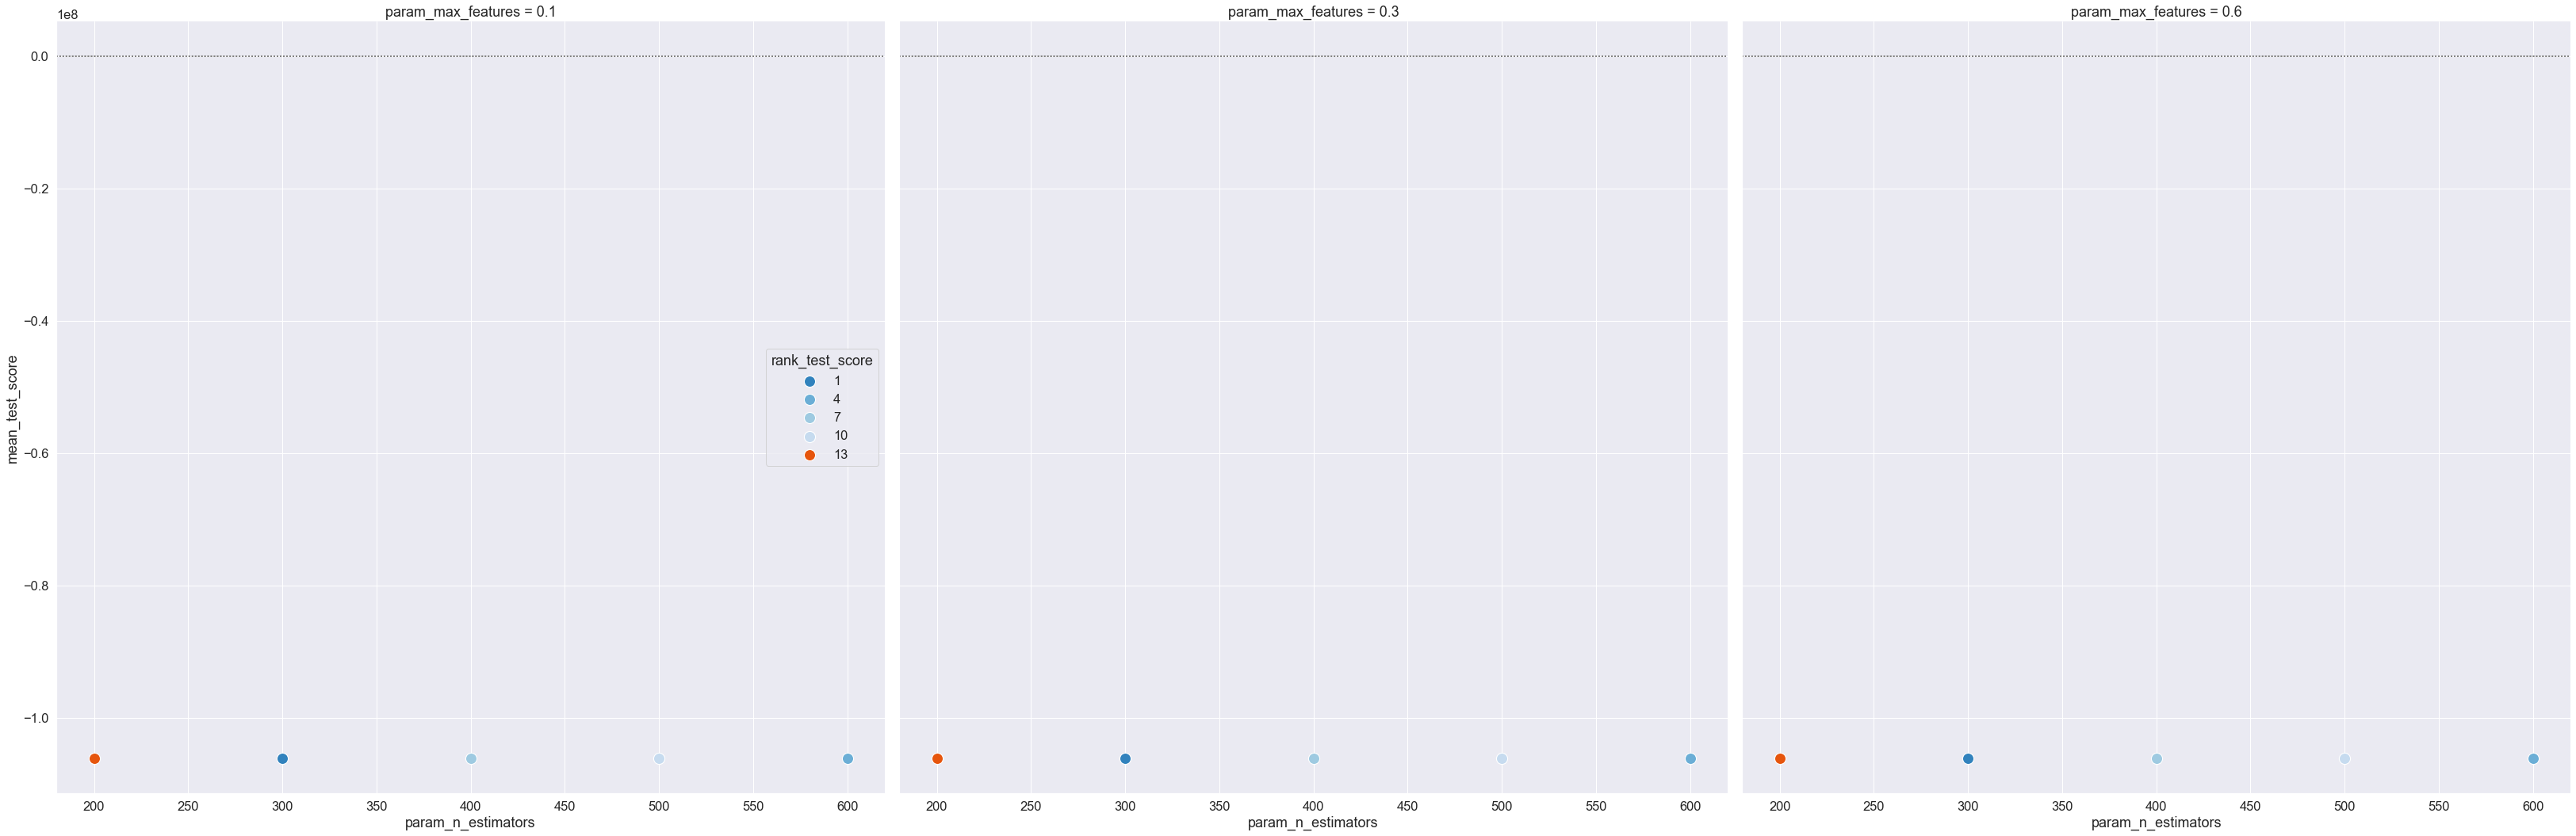

In [10]:
# Build a random forest
from sklearn.ensemble import RandomForestRegressor

# Set paramters for Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}
# Initialise the random forest model
model2 = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)

Tuned_Model2 = model_pipeline(model2, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_Model2,
    ["param_max_features"],
    "param_n_estimators",
    "mean_test_score",
    "RandomForest",
)

In [12]:
predictions = Tuned_Model.predict(x_train)

In [15]:
print(Tuned_Model.score(x_train,Y_train))

-101405669.16512102
